# Cyber Security And Artificial Intelligence
# HW1

## Installations 

In [1]:
import sys
print(f'install sklearn if not installed')
!{sys.executable} -m pip install sklearn
print(f'install ember if not installed')
!{sys.executable} -m pip install git+https://github.com/elastic/ember.git

print(f'install vega if not installed')  #not sure if needed
!{sys.executable} -m pip install vega    #not sure if needed
print(f'install altair if not installed')   #not sure if needed
!{sys.executable} -m pip install altair     #not sure if needed

install sklearn if not installed
install ember if not installed


You should consider upgrading via the 'c:\users\usser\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Running command git clone --filter=blob:none -q https://github.com/elastic/ember.git 'C:\Users\USSeR\AppData\Local\Temp\pip-req-build-gd56ed6v'
You should consider upgrading via the 'c:\users\usser\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



  Cloning https://github.com/elastic/ember.git to c:\users\usser\appdata\local\temp\pip-req-build-gd56ed6v
  Resolved https://github.com/elastic/ember.git to commit 4dee42918694d72d319e731940755146a71f5c6c
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
install altair if not installed


ERROR: Invalid requirement: '#not'
You should consider upgrading via the 'c:\users\usser\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
ERROR: Invalid requirement: '#not'
You should consider upgrading via the 'c:\users\usser\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## Imports & Preparations

### Imports

In [2]:
# math 
import math
import numpy as np
np.random.seed(0)
import pandas as pd
from scipy import stats
from scipy.stats import geom

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import altair as alt
_ = alt.renderers.enable('notebook')

# general
import time
import json
import ast

# EMBER
import ember

# Dimensionality reduction
from sklearn.decomposition import PCA

# Classicfication trail
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

# Some metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
folder_path = r'C:\\Users\\USSeR\\Downloads\\ember_dataset_2018_2\\ember2018\\' # /Users/royrubin/Downloads/ember2018/

### Create Vectorized Dataset

In [4]:
%%time

# ember.create_vectorized_features(folder_path)

Wall time: 0 ns


### Create "Metadata"

In [5]:
%%time

# ember.create_metadata(folder_path)

Wall time: 0 ns


## Perform EDA on metadata

In [6]:
metadata_dataframe = ember.read_metadata(folder_path)

In [7]:
print(metadata_dataframe.shape)
metadata_dataframe.head(5)

(1000000, 5)


sha256 appeared  label avclass  \
0  0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...  2006-12      0     NaN   
1  c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...  2007-01      0     NaN   
2  eac8ddb4970f8af985742973d6f0e06902d42a3684d791...  2007-02      0     NaN   
3  7f513818bcc276c531af2e641c597744da807e21cc1160...  2007-02      0     NaN   
4  ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...  2007-02      0     NaN   

  subset  
0  train  
1  train  
2  train  
3  train  
4  train

In [8]:
metadata_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   sha256    1000000 non-null  object
 1   appeared  1000000 non-null  object
 2   label     1000000 non-null  int64 
 3   avclass   485000 non-null   object
 4   subset    1000000 non-null  object
dtypes: int64(1), object(4)
memory usage: 45.8+ MB


In [9]:
metadata_dataframe.describe(include='all')

sha256 appeared  \
count                                             1000000  1000000   
unique                                            1000000      141   
top     0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...  2018-10   
freq                                                    1   117222   
mean                                                  NaN      NaN   
std                                                   NaN      NaN   
min                                                   NaN      NaN   
25%                                                   NaN      NaN   
50%                                                   NaN      NaN   
75%                                                   NaN      NaN   
max                                                   NaN      NaN   

                 label avclass   subset  
count   1000000.000000  485000  1000000  
unique             NaN    3226        2  
top                NaN   xtrat    train  
freq               NaN   41564   800000  
mean          0.200000     NaN      NaN  
std           0.748332     NaN      NaN  
min          -1.000000     NaN      NaN  
25%           0.000000     NaN      NaN  
50%           0.000000     NaN      NaN  
75%           1.000000     NaN      NaN  
max           1.000000     NaN      NaN

data_subset 
{'train': 800000, 'test': 200000}


Text(0.5, 1.0, 'data_subset')

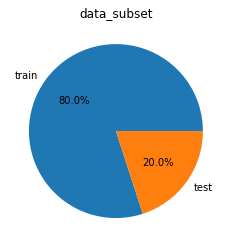

In [10]:
data_subset = metadata_dataframe.subset.value_counts(normalize=False, sort=True).to_dict()  # normalize returns the amount of samples
print(f'data_subset \n{data_subset}')
plt.pie(data_subset.values(), labels=data_subset.keys(), autopct="%1.1f%%")
plt.title("data_subset")

label counts 
{'0 : Benign': 400000, '1 : Malicious': 400000, '-1 : Unlabeled': 200000}


Text(0.5, 1.0, 'Overall labels count')

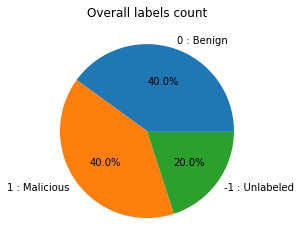

In [11]:
label_counts = metadata_dataframe.label.value_counts(normalize=False, sort=True).to_dict()  # normalize returns the amount of samples
label_counts['0 : Benign'] = label_counts.pop(0)
label_counts['1 : Malicious'] = label_counts.pop(1)
label_counts['-1 : Unlabeled'] = label_counts.pop(-1)

print(f'label counts \n{label_counts}')
plt.pie(label_counts.values(), labels=label_counts.keys(), autopct="%1.1f%%")
plt.title("Overall labels count")


working on train
label counts 
{'0 : Benign': 300000, '1 : Malicious': 300000, '-1 : Unlabeled': 200000}


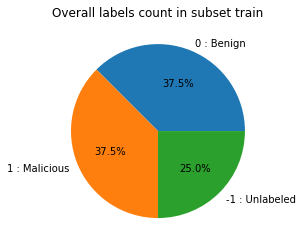


working on test
label counts 
{'0 : Benign': 100000, '1 : Malicious': 100000, '-1 : Unlabeled': 0}


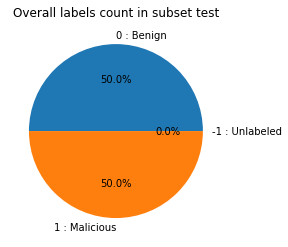

In [12]:
for subset in ['train','test']:
    print(f'\nworking on {subset}')
    label_counts = metadata_dataframe[metadata_dataframe['subset'] == subset].label.value_counts(normalize=False, sort=True).to_dict()  # normalize returns the amount of samples
    label_counts['0 : Benign'] = label_counts.pop(0)
    label_counts['1 : Malicious'] = label_counts.pop(1)
    label_counts['-1 : Unlabeled'] = label_counts.pop(-1) if -1 in label_counts.keys() else 0

    print(f'label counts \n{label_counts}')

    plt.figure(0)
    plt.pie(label_counts.values(), labels=label_counts.keys(), autopct="%1.1f%%")
    plt.title(f"Overall labels count in subset {subset}")
    plt.show()

In [13]:
# groupby_df = metadata_dataframe.groupby(['appeared']).size()
# sns.barplot(x = groupby_df.index, y = groupby_df.values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2018-01'),
  Text(1, 0, '2018-02'),
  Text(2, 0, '2018-03'),
  Text(3, 0, '2018-04'),
  Text(4, 0, '2018-05'),
  Text(5, 0, '2018-06'),
  Text(6, 0, '2018-07'),
  Text(7, 0, '2018-08'),
  Text(8, 0, '2018-09'),
  Text(9, 0, '2018-10'),
  Text(10, 0, '2018-11'),
  Text(11, 0, '2018-12')])

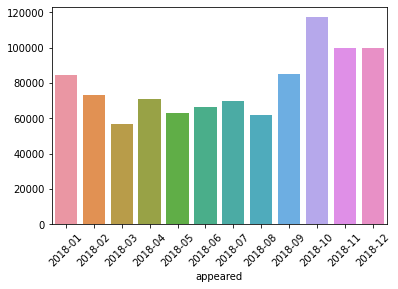

In [14]:
# Plot when did all of the samples from 2018 appear
groupby_df = metadata_dataframe[metadata_dataframe.appeared.str.contains('2018',case=False)]
groupby_df = groupby_df.groupby(['appeared']).size()
plt.figure(0)
sns.barplot(x = groupby_df.index, y = groupby_df.values)
plt.xticks(rotation = 45)

## Perform EDA on vectorized data

In [15]:
%%time
X_train, y_train, X_test, y_test = ember.read_vectorized_features(folder_path)

Wall time: 2 ms


In [16]:
print(f'X_train.shape {X_train.shape}')
print(f'X_test.shape {X_test.shape}')
print(f'y_train.shape {y_train.shape}')
print(f'y_test.shape {y_test.shape}')

X_train.shape (800000, 2381)
X_test.shape (200000, 2381)
y_train.shape (800000,)
y_test.shape (200000,)


In [17]:
print(X_train.shape)
X_train[0:5,0:5]

(800000, 2381)


memmap([[0.01467612, 0.00422187, 0.00392268, 0.00402875, 0.00400715],
        [0.18452372, 0.0313075 , 0.00569281, 0.00595852, 0.00814364],
        [0.25173673, 0.01420455, 0.00684149, 0.00855602, 0.02349299],
        [0.00896443, 0.00405471, 0.00392475, 0.00393569, 0.00403662],
        [0.02040114, 0.00521317, 0.00451895, 0.00409687, 0.00423987]],
       dtype=float32)

In [18]:
X_train[0,0]

0.014676122

In [19]:
%%time

n_components = 40

print(f'Performing PCA on train data')
pca = PCA(n_components=n_components).fit(X_train)

Performing PCA on train data
Wall time: 1min 38s


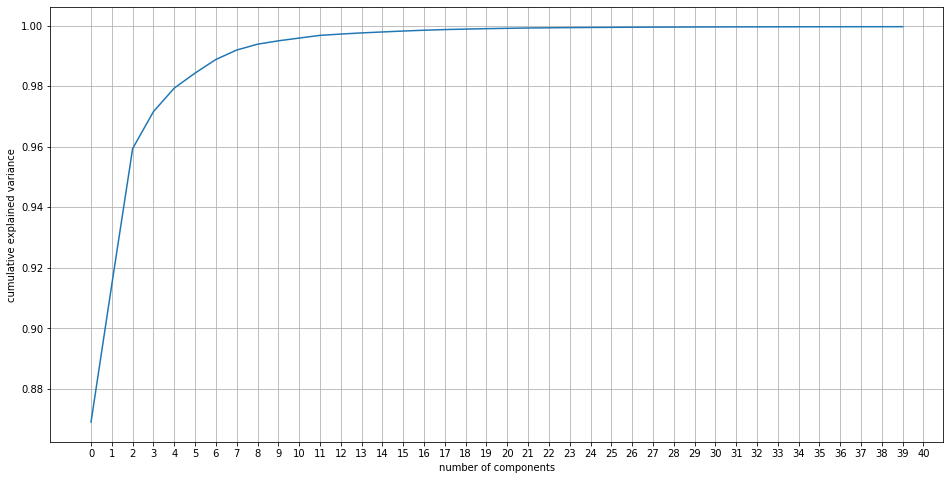

In [20]:
variance_ratio = pca.explained_variance_ratio_  #assumption: this is already sorted (importent for the cumsum)
cumulative_sum = np.cumsum(variance_ratio)
plt.figure(0, figsize=(16,8))
plt.plot(cumulative_sum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(np.arange(0, len(cumulative_sum)+1, 1.0))  
plt.grid()
plt.show()

In [21]:
for i in range(1,11):
    print(f'(VARIANCE!?!?*****) cumulative sum of the first {i} (sorted) componenets is : {cumulative_sum[i]}')

(VARIANCE!?!?*****) cumulative sum of the first 1 (sorted) componenets is : 0.9145529436053341
(VARIANCE!?!?*****) cumulative sum of the first 2 (sorted) componenets is : 0.9593771055498417
(VARIANCE!?!?*****) cumulative sum of the first 3 (sorted) componenets is : 0.9715906701323171
(VARIANCE!?!?*****) cumulative sum of the first 4 (sorted) componenets is : 0.9793552145675252
(VARIANCE!?!?*****) cumulative sum of the first 5 (sorted) componenets is : 0.9843209826586208
(VARIANCE!?!?*****) cumulative sum of the first 6 (sorted) componenets is : 0.9888180652337712
(VARIANCE!?!?*****) cumulative sum of the first 7 (sorted) componenets is : 0.9919270190316045
(VARIANCE!?!?*****) cumulative sum of the first 8 (sorted) componenets is : 0.9938595356193121
(VARIANCE!?!?*****) cumulative sum of the first 9 (sorted) componenets is : 0.9949757239712379
(VARIANCE!?!?*****) cumulative sum of the first 10 (sorted) componenets is : 0.9958855273005602


In [22]:
# %%time

# colormap = np.array(['blue','red','yellow','orange','purple'])
# plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],c=colormap[model.labels_], s=40)
# plt.title('K Mean Classification')
# plt.show()

#### Try to use classification on the PCA, just to see how it is used

In [23]:
n_components = 40

In [24]:
def make_predictions_and_print_results(model, X_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'prediction accuracy: train {accuracy_score(y_train_labeled_only, y_train_pred)}')
    print(f'prediction accuracy: test {accuracy_score(y_test, y_test_pred)}')
    
    #prepare
    fp = np.sum((y_test_pred == 1) & (y_test == 0))
    tp = np.sum((y_test_pred == 1) & (y_test == 1))
    fn = np.sum((y_test_pred == 0) & (y_test == 1))
    tn = np.sum((y_test_pred == 0) & (y_test == 0))

    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    print(f'fpr {fpr} tpr {tpr}')

    precision = tp / (tp + fp)
    print(f'precision {precision}')

    cm = confusion_matrix(y_test, y_test_pred) 
    print(cm)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # cm = cm.astype('float') / len(y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels={0: 'Benign', 1:'Malicious'})
    disp.plot()
    plt.show()

In [25]:
%%time

indices = [i for i, y in enumerate(y_train) if y == 0 or y == 1]
y_train_labeled_only = y_train[indices]
X_train_labeled_only = X_train[indices,:]

X_train_labeled_only = np.array(X_train_labeled_only)  #NOTE: this was not here earlier. without this, XGBOOST made 87% test accuracy and RF made 95% test accuracy

Wall time: 14.5 s


In [26]:
# verify sizes
print(y_train.shape, X_train.shape)
print(y_train_labeled_only.shape, X_train_labeled_only.shape)

(800000,) (800000, 2381)
(600000,) (600000, 2381)


In [27]:
%%time
## Took 2 mins 

# prepare pipeline
scaler = StandardScaler()
pca = PCA(n_components=n_components)
lgbm = LGBMClassifier(objective='binary', random_state=5)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("lgbm", lgbm)])

#
pipe.fit(X_train_labeled_only, y_train_labeled_only)

Wall time: 1min 36s


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=40)),
                ('lgbm', LGBMClassifier(objective='binary', random_state=5))])

prediction accuracy: train 0.8999616666666667
prediction accuracy: test 0.87523
fpr 0.1567 tpr 0.90716
precision 0.8527061831443987
[[84330 15670]
 [ 9284 90716]]


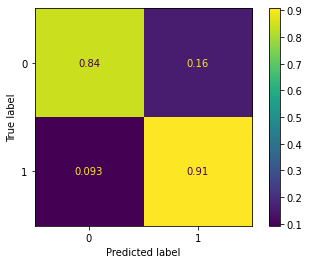

Wall time: 24 s


In [28]:
%%time
make_predictions_and_print_results(pipe, X_train_labeled_only, X_test, y_test)

In [29]:
%%time
## 31 mins
model = RandomForestClassifier(random_state=0)
model.fit(X_train_labeled_only, y_train_labeled_only)

Wall time: 32min 8s


RandomForestClassifier(random_state=0)

prediction accuracy: train 0.9999966666666666
prediction accuracy: test 0.953545
fpr 0.03988 tpr 0.94697
precision 0.959588589957947
[[96012  3988]
 [ 5303 94697]]


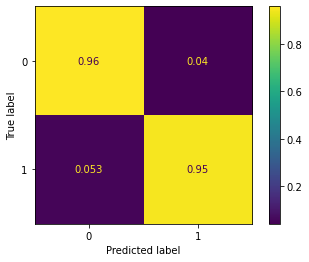

Wall time: 41.6 s


In [30]:
%%time
make_predictions_and_print_results(model, X_train_labeled_only, X_test, y_test)

In [31]:
%%time
"""
Warning Impurity-based feature importances can be misleading for high cardinality features (many unique values). See Permutation feature importance as an alternative below.
"""
sorted_list_of_indices = np.argsort(model.feature_importances_) #returns indices sorted
print(sorted_list_of_indices[0:20])  
print(sorted_list_of_indices[-20:])  

[910 667 669 670 672 917 673 912 674 675 676 909 908 919 905 904 900 899
 898 896]
[ 111  655  509  589  525  502  596  637 1060 2364  507  499  504  654
  510  501  613 2360  511 2359]
Wall time: 47.8 ms


##### try to create model from only 20 most important features by impurity method (see above)

In [61]:
%%time

num_of_features = 20

wanted_features_indices = list(sorted_list_of_indices[-num_of_features:])
wanted_features_indices = sorted(wanted_features_indices)
X_train_new = X_train_labeled_only[:, wanted_features_indices]
X_test_new = X_test[:, wanted_features_indices]

Wall time: 389 ms


In [33]:
%%time
## ??? mins
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train_new, y_train_labeled_only)

Wall time: 2min 53s


RandomForestClassifier(random_state=0)

prediction accuracy: train 0.9998383333333334
prediction accuracy: test 0.916045
fpr 0.08941 tpr 0.9215
precision 0.9115549356520363
[[91059  8941]
 [ 7850 92150]]


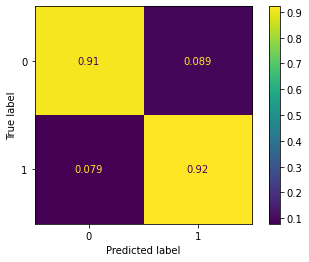

Wall time: 20.5 s


In [34]:
%%time
make_predictions_and_print_results(model2, X_train_new, X_test_new, y_test)

### the prediction above was good. we will try to perform EDA on the given 20 features

In [63]:
%%time

X_and_y = np.concatenate((X_train_new, y_train_labeled_only.reshape(-1,1)), axis=1)

# set columns and create pd dataframe from numpy
wanted_features_indices = sorted(list(wanted_features_indices))
columns = [str(col) for col in wanted_features_indices]
if 'label' not in wanted_features_indices:
    columns.append('label')
X_and_y = pd.DataFrame(X_and_y, columns=columns)

<class 'list'>
[111, 499, 501, 502, 504, 507, 509, 510, 511, 525, 589, 596, 613, 637, 654, 655, 1060, 2359, 2360, 2364]
['111', '499', '501', '502', '504', '507', '509', '510', '511', '525', '589', '596', '613', '637', '654', '655', '1060', '2359', '2360', '2364', 'label']
Wall time: 13 ms


In [64]:
X_and_y.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   111     600000 non-null  float32
 1   499     600000 non-null  float32
 2   501     600000 non-null  float32
 3   502     600000 non-null  float32
 4   504     600000 non-null  float32
 5   507     600000 non-null  float32
 6   509     600000 non-null  float32
 7   510     600000 non-null  float32
 8   511     600000 non-null  float32
 9   525     600000 non-null  float32
 10  589     600000 non-null  float32
 11  596     600000 non-null  float32
 12  613     600000 non-null  float32
 13  637     600000 non-null  float32
 14  654     600000 non-null  float32
 15  655     600000 non-null  float32
 16  1060    600000 non-null  float32
 17  2359    600000 non-null  float32
 18  2360    600000 non-null  float32
 19  2364    600000 non-null  float32
 20  label   600000 non-null  float32
dtypes: float32

In [65]:
X_and_y.describe(include='all')  

111            499            501            502  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean        0.006599       0.018478       0.018363       0.018586   
std         0.006868       0.022512       0.022693       0.022479   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.003188       0.000000       0.000000       0.000000   
50%         0.004015       0.005473       0.004938       0.005501   
75%         0.006658       0.034852       0.034851       0.036621   
max         0.222076       0.162327       0.132413       0.138841   

                 504            507            509            510  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean        0.018589       0.017511       0.017426       0.017907   
std         0.023166       0.021934       0.021855       0.022334   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.004991       0.004413       0.004410       0.004611   
75%         0.034788       0.033421       0.033428       0.034080   
max         0.140167       0.159090       0.140179       0.140690   

                 511            525  ...            596            613  \
count  600000.000000  600000.000000  ...  600000.000000  600000.000000   
mean        0.018545       0.003545  ...       0.004569      13.005785   
std         0.023122       0.005418  ...       0.017955      98.927498   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000543  ...       0.001020       0.000000   
50%         0.005012       0.001767  ...       0.002445       0.000000   
75%         0.035511       0.006017  ...       0.006630       9.000000   
max         0.187356       0.887742  ...       0.982517   26103.000000   

                 637            654            655           1060  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean       -0.260197       0.150392      -0.832495       0.707225   
std         0.438742       0.369338       0.374296       0.494811   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%        -1.000000       0.000000      -1.000000       0.000000   
50%         0.000000       0.000000      -1.000000       1.000000   
75%         0.000000       0.000000      -1.000000       1.000000   
max         0.000000       1.000000       1.000000       3.000000   

               2359          2360          2364     label  
count  6.000000e+05  6.000000e+05  6.000000e+05  600000.0  
mean   4.065783e+05  2.004575e+06  5.772214e+05       0.5  
std    4.049613e+07  6.008754e+07  2.951434e+07       0.5  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.0  
25%    0.000000e+00  0.000000e+00  0.000000e+00       0.0  
50%    0.000000e+00  0.000000e+00  0.000000e+00       0.5  
75%    3.800000e+03  1.075200e+04  6.196800e+04       1.0  
max    4.082706e+09  4.294967e+09  4.254354e+09       1.0  

[8 rows x 21 columns]

Text(0.5, 1.0, 'Correlation matrix of all the features')

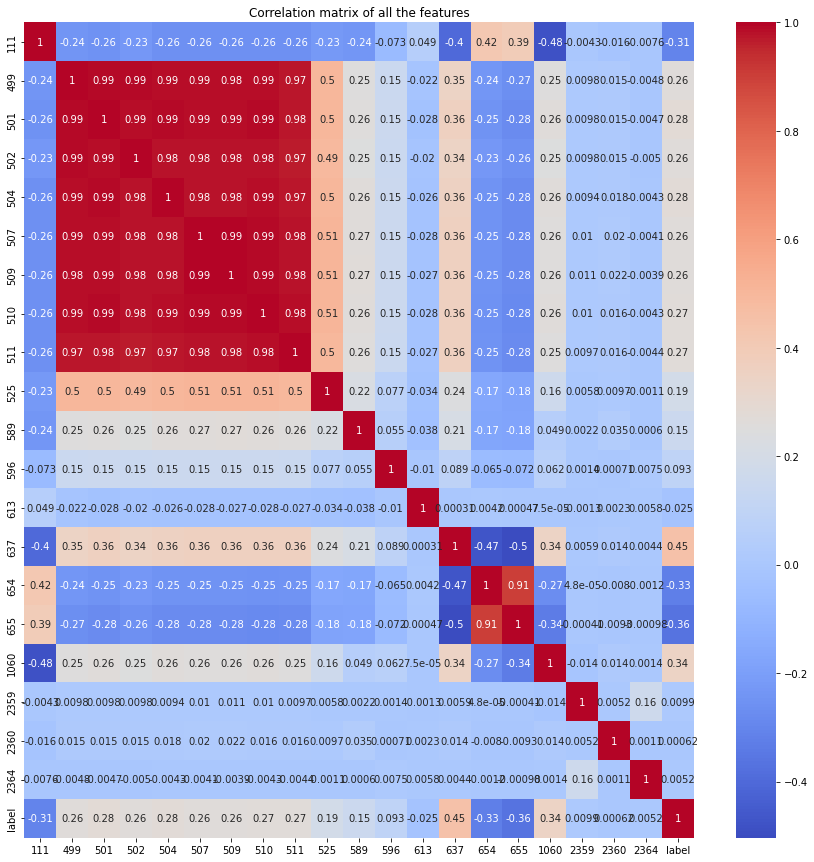

In [67]:
%%time
plt.figure(figsize=(14, 14))
sns.heatmap(X_and_y.corr(), cmap='coolwarm',annot = True)
plt.title('Correlation matrix of all the features')

Wall time: 1h 57min 47s


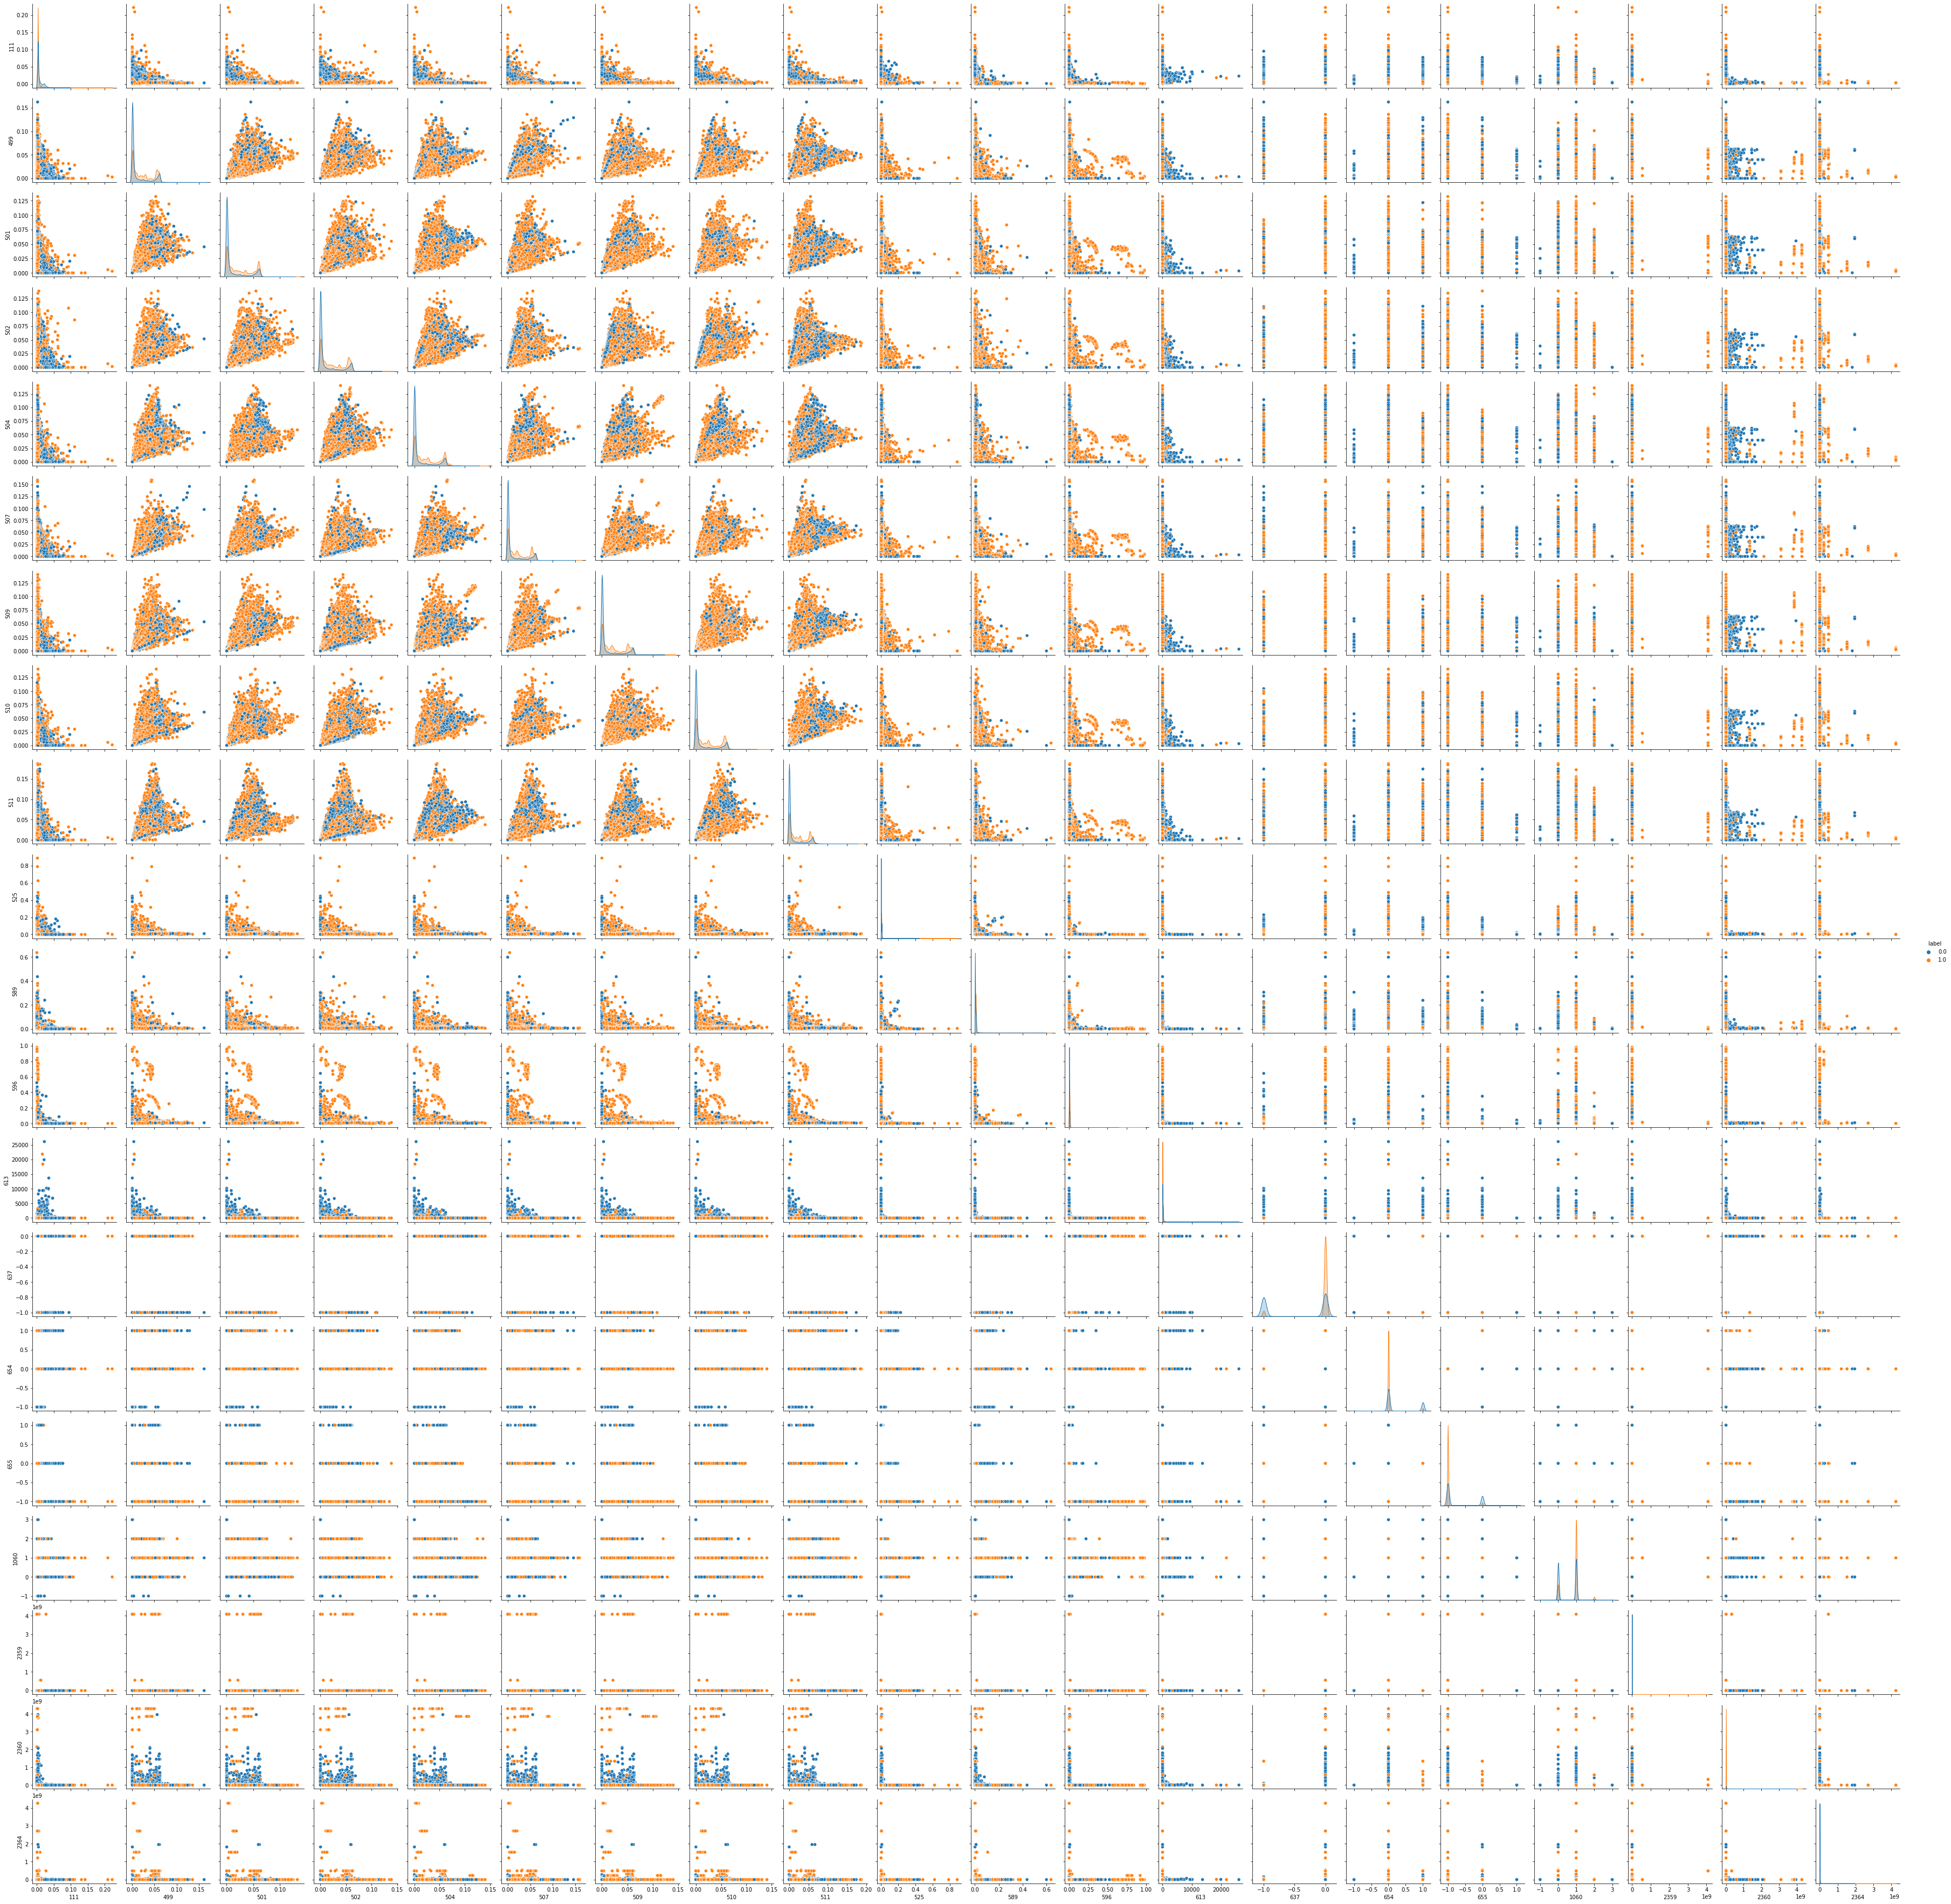

In [68]:
%%time
## takes 2 hours !!!!!!!!!!!
sns.pairplot(X_and_y, hue="label", diag_kind="kde")

##### try to create model from only 20 most important features by permutation method (see above)

In [69]:
# %%time
# """
# https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance

# Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.
# """
# r = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

In [70]:
# uncomment later !

In [71]:
# for i in r.importances_mean.argsort()[::-1][-20:]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{diabetes.feature_names[i]:<8}"
#                 f"{r.importances_mean[i]:.3f}"
#                 f" +/- {r.importances_std[i]:.3f}")

## Perform EDA on original data

### Features description (from the paper)
> 3.2.1 **Parsed features**. The dataset includes five groups
of features that are extracted after parsing the PE file. We
leverage the Library to Instrument Executable Formats [21]
as a convenient PE parser. LIEF names are used for strings
that represent symbolic objects, such as characteristics and
properties. For some examples of these strings, the reader
is referred to Figure 2. Each of the parsed feature types are
described in more detail below.

>> **General file information**. The set of features in the general file information group includes the file size and basic
information obtained from the PE header: the virtual size
of the file, the number of imported and exported functions,
whether the file has a debug section, thread local storage,
resources, relocations, or a signature, and the number of
symbols.

>> **Header information**. From the COFF header, we report
the timestamp in the header, the target machine (string)
and a list of image characteristics (list of strings). From the
optional header, we provide the target subsystem (string),
DLL characteristics (a list of strings), the file magic as
a string (e.g., “PE32”), major and minor image versions,
linker versions, system versions and subsystem versions,
and the code, headers and commit sizes. To create model
features, string descriptors such as DLL characteristics,
target machine, subsystem, etc. are summarized using the
feature hashing trick prior to training a model, with 10 bins
allotted for each noisy indicator vector.

>> **Imported functions**. We parse the import address table
and report the imported functions by library. To create
model features for the baseline model, we simply collect
the set of unique libraries and use the hashing trick to
sketch the set (256 bins). Similarly, we use the hashing trick
(1024 bins) to capture individual functions, by representing
each as a string such as library:FunctionName pair (e.g.,
kernel32.dll:CreateFileMappingA).

>> **Exported functions**. The raw features include a list of
the exported functions. These strings are summarized into
model features using the hashing trick with 128 bins.

>> **Section information**. Properties of each section are provided and include the name, size, entropy, virtual size, and
a list of strings representing section characteristics. The entry point is specified by name. To convert to model features,
we use the hashing trick on (section name, value) pairs to
create vectors containing section size, section entropy, and
virtual size (50 bins each). We also use the hashing trick
to capture the characteristics (list of strings) for the entry
point.

> 3.2.2 **Format-agnostic features**. The EMBER dataset also
includes three groups of features that are format agnostic,
in that they do not require parsing of the PE file for extraction: a raw byte histogram, byte entropy histogram based
on work previously published in [26], and string extraction.

>> **Byte histogram**. The byte histogram contains 256 integer
values, representing the counts of each byte value within
the file. When generating model features, this byte histogram is normalized to a distribution, since the file size is
represented as a feature in the general file information.

>> **Byte-entropy histogram**. The byte entropy histogram approximates the joint distribution p(H,X) of entropy H and
byte value X. This is done as described in [26], by computing the scalar entropy H for a fixed-length window and
pairing it with each byte occurrence within the window.
This is repeated as the window slides across the input bytes.
In our implementation, we use a window size of 2048 and
a step size of 1024 bytes, with 16 × 16 bins that quantize
entropy and the byte value. Before training, we normalize
these counts to sum to unity.

>> **String information**. The dataset includes simple statistics about printable strings (consisting of characters in the
range 0x20 to 0x7f, inclusive) that are at least five printable characters long. In particular, reported are the number
of strings, their average length, a histogram of the printable characters within those strings, and the entropy of
characters across all printable strings. The printable characters distribution provides distinct information from the
byte histogram information above since it is derived only
from strings containing at least five consecutive printable
characters. In addition, the string feature group includes
the number of strings that begin with C:\ (case insensitive)
that may indicate a path, the number of occurrences of
http:// or https:// (case insensitive) that may indicate a
URL, the number of occurrences of HKEY_ that may indicate
a registry key, and the number of occurrences of the short
string MZ that may provide weak evidence of a Windows
PE dropper or bundled executables. By providing a simple
statistical summary of strings rather than a listing of raw
strings, we mitigate privacy concerns that may exist for
some benign files

### Create original unvectorized dataset [performed once, takes 20~ minutes on strong computer] 

In [72]:
# def read_all_data():
#     print(f'** Starting to read all data **')
#     print(f'tesing - folder path {folder_path}')
#     filenames = [
#         'train_features_0.jsonl',
#         'train_features_1.jsonl',
#         'train_features_2.jsonl',
#         'train_features_3.jsonl',
#         'train_features_4.jsonl',
#         'train_features_5.jsonl',
#     ]

#     df = None
#     for filename in filenames:
#         ##
#         print(f'\nreading {filename}')
#         start = time.time()
#         temp_df = pd.read_json(folder_path+filename, lines=True)
#         end = time.time()
#         print(f'performed in {(end - start) / 60} minutes')
#         print(f'temp_df.shape {temp_df.shape}')
        
#         ##
#         print(f'concatanating {filename}')
#         start = time.time()
#         if df is None:
#             df = temp_df
#         else:
#             df = pd.concat([df, temp_df], axis=0, ignore_index=True)
        
#         end = time.time()
#         print(f'performed in {(end - start) / 60} minutes')
#         del temp_df
    
#     # Finished reading all files !
#     print(f'Finished reading all files !')
#     df.to_csv(f'{folder_path}_new_df.csv')
#     return df

In [4]:
# %%time

# column = 'label'
# df = read_all_data()

### Load the prepared df

In [7]:
%%time
# ~ 1 min
df = pd.read_csv(f'{folder_path}\\concatanated_original_train_df.csv')

Wall time: 59.7 s


### Start exploring the train df

In [8]:
df.shape

(800000, 15)

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       800000 non-null  int64 
 1   sha256           800000 non-null  object
 2   md5              800000 non-null  object
 3   appeared         800000 non-null  object
 4   label            800000 non-null  int64 
 5   avclass          385679 non-null  object
 6   histogram        800000 non-null  object
 7   byteentropy      800000 non-null  object
 8   strings          800000 non-null  object
 9   general          800000 non-null  object
 10  header           800000 non-null  object
 11  section          800000 non-null  object
 12  imports          800000 non-null  object
 13  exports          800000 non-null  object
 14  datadirectories  800000 non-null  object
dtypes: int64(2), object(13)
memory usage: 91.6+ MB


In [10]:
df.describe(include='all')

Unnamed: 0                                             sha256  \
count   800000.000000                                             800000   
unique            NaN                                             800000   
top               NaN  0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...   
freq              NaN                                                  1   
mean    399999.500000                                                NaN   
std     230940.252013                                                NaN   
min          0.000000                                                NaN   
25%     199999.750000                                                NaN   
50%     399999.500000                                                NaN   
75%     599999.250000                                                NaN   
max     799999.000000                                                NaN   

                                     md5 appeared          label avclass  \
count                             800000   800000  800000.000000  385679   
unique                            800000      139            NaN    3068   
top     63956d6417f8f43357d9a8e79e52257e  2018-10            NaN   xtrat   
freq                                   1   117222            NaN   22284   
mean                                 NaN      NaN       0.125000     NaN   
std                                  NaN      NaN       0.780625     NaN   
min                                  NaN      NaN      -1.000000     NaN   
25%                                  NaN      NaN      -0.250000     NaN   
50%                                  NaN      NaN       0.000000     NaN   
75%                                  NaN      NaN       1.000000     NaN   
max                                  NaN      NaN       1.000000     NaN   

                                                histogram  \
count                                              800000   
unique                                             799611   
top     [43650, 3393, 2743, 2499, 1693, 1123, 2402, 13...   
freq                                                   29   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              byteentropy  \
count                                              800000   
unique                                             723040   
top     [10240, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
freq                                                 2792   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                  strings  \
count                                              800000   
unique                                             687593   
top     {'numstrings': 76, 'avlength': 7.4473684210526...   
freq                                                12390   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                             

In [11]:
df.head(3)

Unnamed: 0                                             sha256  \
0           0  0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...   
1           1  c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...   
2           2  eac8ddb4970f8af985742973d6f0e06902d42a3684d791...   

                                md5 appeared  label avclass  \
0  63956d6417f8f43357d9a8e79e52257e  2006-12      0     NaN   
1  6f7bde7a1126debf0cc359a54953efc1  2007-01      0     NaN   
2  7520c8f9534ca818726a4feaebf49e2b  2007-02      0     NaN   

                                           histogram  \
0  [45521, 13095, 12167, 12496, 12429, 11709, 118...   
1  [93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...   
2  [45369, 2560, 1233, 1542, 4234, 515, 613, 1542...   

                                         byteentropy  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...   
2  [6144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                             strings  \
0  {'numstrings': 14573, 'avlength': 5.9720716393...   
1  {'numstrings': 1803, 'avlength': 11.1913477537...   
2  {'numstrings': 1238, 'avlength': 12.0201938610...   

                                             general  \
0  {'size': 3101705, 'vsize': 380928, 'has_debug'...   
1  {'size': 504320, 'vsize': 524288, 'has_debug':...   
2  {'size': 180224, 'vsize': 180224, 'has_debug':...   

                                              header  \
0  {'coff': {'timestamp': 1124149349, 'machine': ...   
1  {'coff': {'timestamp': 1091600092, 'machine': ...   
2  {'coff': {'timestamp': 892092777, 'machine': '...   

                                             section  \
0  {'entry': '.text', 'sections': [{'name': '.tex...   
1  {'entry': '.text', 'sections': [{'name': '.tex...   
2  {'entry': '.text', 'sections': [{'name': '.tex...   

                                             imports exports  \
0  {'KERNEL32.dll': ['SetFileTime', 'CompareFileT...      []   
1  {'ADVAPI32.dll': ['ConvertStringSecurityDescri...      []   
2  {'ADVAPI32.dll': ['RegSetValueExA', 'RegDelete...      []   

                                     datadirectories  
0  [{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_...  
1  [{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_...  
2  [{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_...

In [12]:
# # replace all ' with " or json loading purposes ?
# df.replace("\'", "\"",inplace=True)

### Explore: "appeared" feature [Train set]

In [13]:
appeared_df = df['appeared']


In [14]:
appeared_df.value_counts()

2018-10    117222
2018-09     85352
2018-01     84702
2018-02     73456
2018-04     70962
            ...  
2008-01         1
2008-09         1
2007-04         1
2007-01         1
2006-12         1
Name: appeared, Length: 139, dtype: int64

 <div class="alert alert-block alert-warning">Note: even though we downloaded only 2018 data, there is some data which is not 2018</div>

In [15]:
appeared_df = appeared_df[appeared_df.str.contains('2018',case=False)]
print(f'number of records from 2018: {len(appeared_df)}')
appeared_df.value_counts()

number of records from 2018: 750000


2018-10    117222
2018-09     85352
2018-01     84702
2018-02     73456
2018-04     70962
2018-07     70064
2018-06     66195
2018-05     63000
2018-08     62118
2018-03     56929
Name: appeared, dtype: int64

#### After what we learned, adjust training dataset to be only data from 2018

In [16]:
%%time
df = df[df.appeared.str.contains('2018',case=False)]
df.shape

Wall time: 646 ms


(750000, 15)

#### adjust df so we only keep the labeled records

In [17]:
df = df[df['label'] != -1]

### Preparations for explorations

In [18]:
def prepare_partial_df_from_feature_with_json_values(df, feature_group_name):
    partial_df = df[[feature_group_name]]
    print(partial_df.head(3))
    partial_df[feature_group_name] = partial_df[feature_group_name].apply(ast.literal_eval)  #beware of ast.literal_eval !?
    partial_df_list = partial_df[feature_group_name].to_list()
    flattened_partial_df = pd.DataFrame(partial_df_list)
    
    # add label to the output df
    print(flattened_partial_df.shape)
    flattened_partial_df['label'] = df['label']
    print(f'added labels column. size is now {flattened_partial_df.shape}')
    print(flattened_partial_df.head(3))
    return flattened_partial_df

### Explore: "general" feature group  [Train set]

In [86]:
%%time
flattened_partial_df = prepare_partial_df_from_feature_with_json_values(df, 'general')

                                                 general
50000  {'size': 349811, 'vsize': 28672, 'has_debug': ...
50002  {'size': 161280, 'vsize': 184320, 'has_debug':...
50003  {'size': 6144, 'vsize': 32768, 'has_debug': 0,...


C:\Users\USSeR\AppData\Local\Temp/ipykernel_267160/3653315506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df[feature_group_name] = partial_df[feature_group_name].apply(ast.literal_eval)  #beware of ast.literal_eval !?


(550000, 10)
added labels column. size is now (550000, 11)
     size   vsize  has_debug  exports  imports  has_relocations  \
0  349811   28672          0        0       55                0   
1  161280  184320          0        0      155                1   
2    6144   32768          0        0        1                1   

   has_resources  has_signature  has_tls  symbols  label  
0              1              0        0        0    NaN  
1              1              0        0        0    NaN  
2              1              0        0        0    NaN  
Wall time: 20.3 s


In [87]:
flattened_partial_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   size             550000 non-null  int64  
 1   vsize            550000 non-null  int64  
 2   has_debug        550000 non-null  int64  
 3   exports          550000 non-null  int64  
 4   imports          550000 non-null  int64  
 5   has_relocations  550000 non-null  int64  
 6   has_resources    550000 non-null  int64  
 7   has_signature    550000 non-null  int64  
 8   has_tls          550000 non-null  int64  
 9   symbols          550000 non-null  int64  
 10  label            366198 non-null  float64
dtypes: float64(1), int64(10)
memory usage: 46.2 MB


In [88]:
flattened_partial_df.describe(include='all')  

size         vsize      has_debug        exports  \
count  5.500000e+05  5.500000e+05  550000.000000  550000.000000   
mean   1.485419e+06  1.846970e+06       0.386404      28.101651   
std    5.023008e+06  1.301622e+07       0.486925     441.380540   
min    2.340000e+02  5.120000e+02       0.000000       0.000000   
25%    1.152000e+05  1.187840e+05       0.000000       0.000000   
50%    4.818880e+05  4.014080e+05       0.000000       0.000000   
75%    1.257472e+06  1.339392e+06       1.000000       0.000000   
max    5.361300e+08  4.278288e+09       1.000000   52653.000000   

             imports  has_relocations  has_resources  has_signature  \
count  550000.000000     550000.00000  550000.000000  550000.000000   
mean      106.999218          0.53208       0.873653       0.240460   
std       223.612960          0.49897       0.332241       0.427363   
min         0.000000          0.00000       0.000000       0.000000   
25%         1.000000          0.00000       1.000000       0.000000   
50%        42.000000          1.00000       1.000000       0.000000   
75%       144.000000          1.00000       1.000000       0.000000   
max     21344.000000          1.00000       1.000000       1.000000   

             has_tls        symbols          label  
count  550000.000000  550000.000000  366198.000000  
mean        0.214765      37.854725       0.518613  
std         0.410660    1224.112525       0.499654  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       1.000000  
75%         0.000000       0.000000       1.000000  
max         1.000000  191628.000000       1.000000

Wall time: 1.2 s


Text(0.5, 1.0, 'Correlation matrix of all the features')

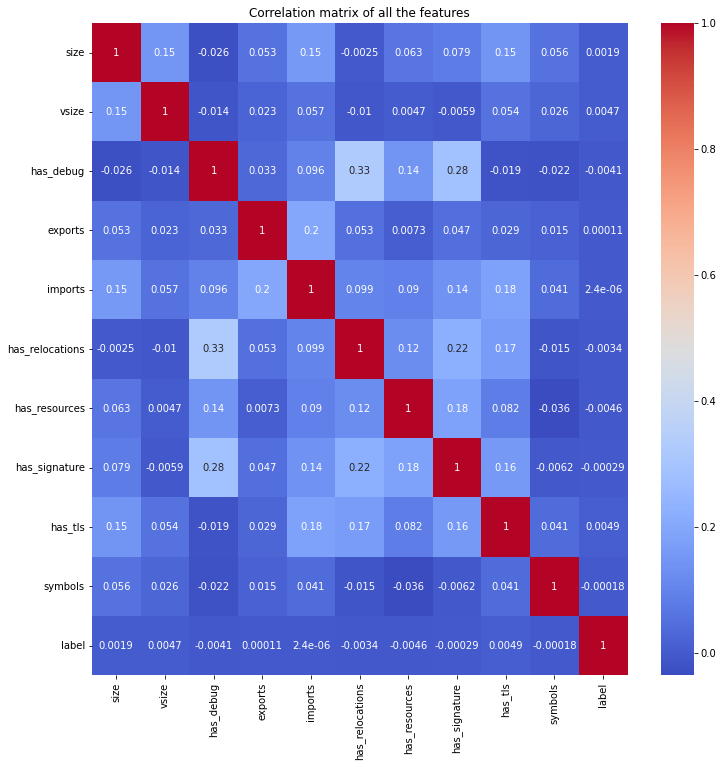

In [89]:
%%time
plt.figure(figsize=(12, 12))
sns.heatmap(flattened_partial_df.corr(),cmap='coolwarm',annot = True)
plt.title('Correlation matrix of all the features')

In [90]:
# %%time
# ## takes 29 mins
# sns.pairplot(flattened_general_df, hue="label", diag_kind="kde")

In [91]:
# plt.figure()
# ax = sns.boxplot(x="size", data=flattened_general_df)
# plt.title('box plot of size feature')

In [92]:
# plt.figure()
# ax = sns.histplot(x="size", data=flattened_general_df, bins=100)
# plt.title('histogram plot of size feature')
# plt.grid()

In [93]:
# ax= sns.jointplot(x=flattened_general_df.size, y=flattened_general_df.exports, marginal_kws=dict(bins=100))
# ax.fig.suptitle('Joint plot')

### Explore: "header" feature group  [Train set]

In [94]:
%%time
# ~1 min
flattened_partial_df = prepare_partial_df_from_feature_with_json_values(df, 'header')

                                                  header
50000  {'coff': {'timestamp': 1301832471, 'machine': ...
50002  {'coff': {'timestamp': 1512336134, 'machine': ...
50003  {'coff': {'timestamp': 1499089577, 'machine': ...


C:\Users\USSeR\AppData\Local\Temp/ipykernel_267160/3653315506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df[feature_group_name] = partial_df[feature_group_name].apply(ast.literal_eval)  #beware of ast.literal_eval !?


(550000, 2)
added labels column. size is now (550000, 3)
                                                coff  \
0  {'timestamp': 1301832471, 'machine': 'I386', '...   
1  {'timestamp': 1512336134, 'machine': 'I386', '...   
2  {'timestamp': 1499089577, 'machine': 'I386', '...   

                                            optional  label  
0  {'subsystem': 'WINDOWS_GUI', 'dll_characterist...    NaN  
1  {'subsystem': 'WINDOWS_GUI', 'dll_characterist...    NaN  
2  {'subsystem': 'WINDOWS_GUI', 'dll_characterist...    NaN  
Wall time: 47.4 s


In [95]:
flattened_partial_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   coff      550000 non-null  object 
 1   optional  550000 non-null  object 
 2   label     366198 non-null  float64
dtypes: float64(1), object(2)
memory usage: 12.6+ MB


In [96]:
# flattened_partial_df.describe(include='all')  

Wall time: 58.7 ms


Text(0.5, 1.0, 'Correlation matrix of all the features')

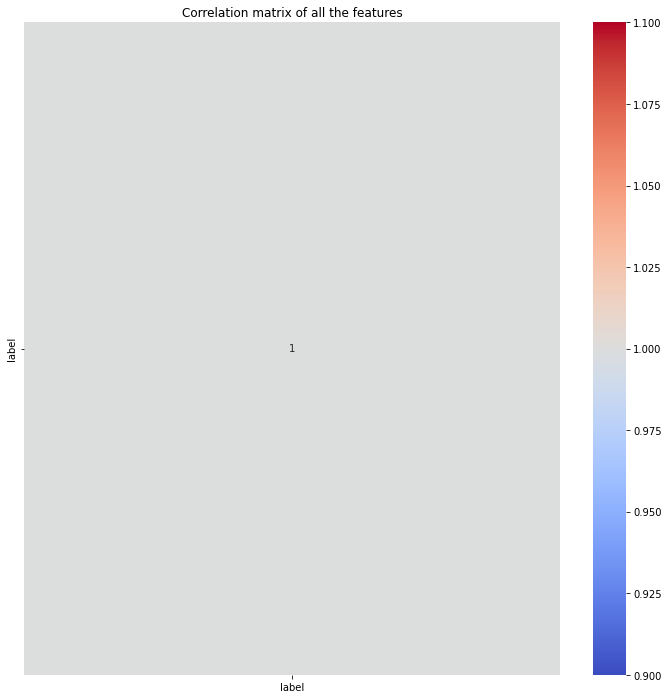

In [97]:
%%time
plt.figure(figsize=(12, 12))
sns.heatmap(flattened_partial_df.corr(),cmap='coolwarm',annot = True)
plt.title('Correlation matrix of all the features')

### Explore: "strings" feature group  [Train set]

In [19]:
%%time
# ~2 mins
flattened_partial_df = prepare_partial_df_from_feature_with_json_values(df, 'strings')

                                                 strings
50000  {'numstrings': 3863, 'avlength': 17.6435412891...
50002  {'numstrings': 1452, 'avlength': 15.4869146005...
50003  {'numstrings': 65, 'avlength': 20.030769230769...


C:\Users\USSeR\AppData\Local\Temp/ipykernel_289548/3653315506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df[feature_group_name] = partial_df[feature_group_name].apply(ast.literal_eval)  #beware of ast.literal_eval !?


(550000, 9)
added labels column. size is now (550000, 10)
   numstrings   avlength                                      printabledist  \
0        3863  17.643541  [7399, 89, 373, 105, 116, 114, 101, 94, 430, 4...   
1        1452  15.486915  [844, 28, 94, 26, 36, 51, 77, 27, 37, 31, 14, ...   
2          65  20.030769  [58, 1, 22, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 3...   

   printables   entropy  paths  urls  registry  MZ  label  
0       68157  5.683164      6    22         0   7    NaN  
1       22487  5.668189      0   204         0   2    NaN  
2        1302  5.111368      0     0         0   1    NaN  
Wall time: 1min 28s


In [20]:
flattened_partial_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   numstrings     550000 non-null  int64  
 1   avlength       550000 non-null  float64
 2   printabledist  550000 non-null  object 
 3   printables     550000 non-null  int64  
 4   entropy        550000 non-null  float64
 5   paths          550000 non-null  int64  
 6   urls           550000 non-null  int64  
 7   registry       550000 non-null  int64  
 8   MZ             550000 non-null  int64  
 9   label          366198 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 42.0+ MB


In [21]:
# flattened_partial_df.describe(include='all')  

Wall time: 253 ms


Text(0.5, 1.0, 'Correlation matrix of all the features')

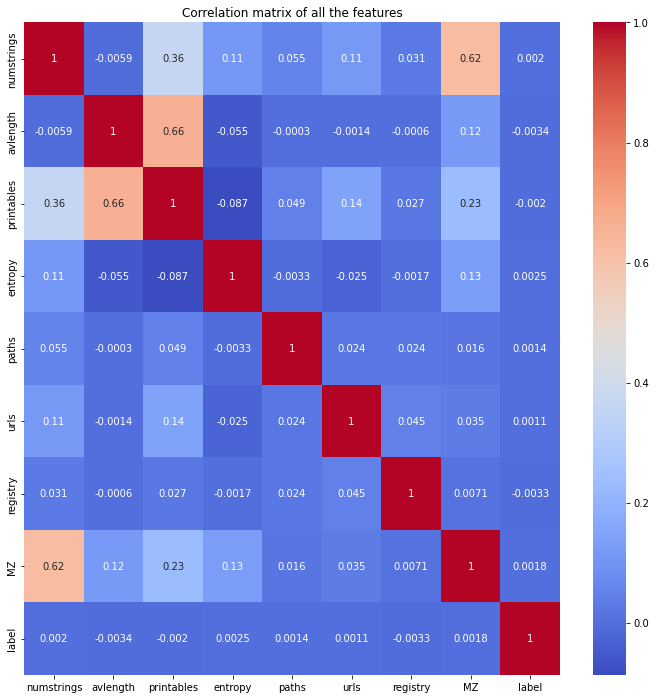

In [22]:
%%time
plt.figure(figsize=(12, 12))
sns.heatmap(flattened_partial_df.corr(),cmap='coolwarm',annot = True)
plt.title('Correlation matrix of all the features')

### Explore: "histogram" feature group  [Train set]

In [23]:
partial_df = df[['histogram']]
partial_df.head(3)

histogram
50000  [60782, 5895, 2020, 1487, 2075, 1367, 1145, 85...
50002  [35534, 3516, 1832, 870, 957, 596, 435, 501, 1...
50003  [3389, 100, 35, 9, 18, 7, 16, 12, 12, 7, 28, 6...

### Explore: "byteentropy" feature group  [Train set]

In [24]:
partial_df = df[['byteentropy']]
partial_df.head(3)

byteentropy
50000  [24434, 11, 18, 5, 9, 8, 35, 21, 3, 4, 8, 4, 2...
50002  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
50003  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

### Explore: "imports" feature group  [Train set]

In [25]:
partial_df = df[['imports']]
partial_df.head(3)

imports
50000  {'MSVCRT.dll': ['memset', 'memcpy', '_stricmp'...
50002  {'WrldFlsh.exe': ['pszStatName', 'dbWeather1',...
50003                   {'mscoree.dll': ['_CorExeMain']}

### Explore: "exports" feature group  [Train set]

In [26]:
partial_df = df[['exports']]
partial_df.head(3)

exports
50000      []
50002      []
50003      []

### Explore: "section" feature group  [Train set]

In [27]:
partial_df = df[['section']]
partial_df.head(3)

section
50000  {'entry': '.code', 'sections': [{'name': '.cod...
50002  {'entry': '.text', 'sections': [{'name': '.tex...
50003  {'entry': '.text', 'sections': [{'name': '.tex...

# Explore Test Set ?